<a href="https://colab.research.google.com/github/jgraving/deepposekit/blob/master/examples/step4a_initialize_annotations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# DeepPoseKit Step 4a - Initialize annotations

This is step 4a of the example notebooks for using DeepPoseKit. This notebook shows you how to use your trained model to initialize the keypoint labels for the unannotated images in your annotation set.

**NOTE**: If you run into problems, you can help us improve DeepPoseKit by [opening an issue](https://github.com/jgraving/deepposekit/issues/new) or [submitting a pull request](https://help.github.com/en/articles/creating-a-pull-request-from-a-fork)

**If you're using Colab**: make sure to go to the “Runtime” dropdown menu, select “Change runtime type” and select `GPU` in the "Hardware accelerator" drop-down menu


If you haven't already installed DeepPoseKit you can run the next cell

In [ ]:
import sys
!{sys.executable} -m pip install -U deepposekit

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import glob

from deepposekit.models import load_model
from deepposekit.io import DataGenerator, ImageGenerator

from os.path import expanduser

try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

HOME = expanduser("~") if not IN_COLAB else '.'

Use the next cell to download the example data into your home directory

In [ ]:
!git clone https://github.com/jgraving/deepposekit-data {HOME + '/deepposekit-data'}

Find the saved models

In [7]:
models = sorted(glob.glob(HOME + '/deepposekit-data/datasets/fly/*model*.h5'))
models

['/Users/jake/deepposekit-data/datasets/fly/best_model_densenet.h5']

Find the annotation sets

In [3]:
annotations = sorted(glob.glob(HOME + '/deepposekit-data/datasets/fly/*annotation*.h5'))
annotations

['/Users/jake/deepposekit-data/datasets/fly/annotation_data_release.h5',
 '/Users/jake/deepposekit-data/datasets/fly/example_annotation_set.h5',
 '/Users/jake/deepposekit-data/datasets/fly/example_annotation_set1.h5']

# Load the trained model

This loads the trained model into memory for making predictions

In [8]:
model = load_model(HOME + '/deepposekit-data/datasets/fly/best_model_densenet.h5')

W0929 12:52:50.678194 4792473024 deprecation.py:506] From /Users/jake/Library/Python/3.7/lib/python/site-packages/tensorflow/python/ops/init_ops.py:97: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0929 12:52:50.679184 4792473024 deprecation.py:506] From /Users/jake/Library/Python/3.7/lib/python/site-packages/tensorflow/python/ops/init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0929 12:52:50.693815 4792473024 deprecation.py:506] From /Users/jake/Library/Python/3.7/lib/python/site-packages/tensorflow/python/ops/init_ops.py:97: calling GlorotUniform.__init__ (from tensorf

# Initialize unannotated data

This creates a `DataGenerator` instance for loading the data, which is then wrapped in an `ImageGenerator`. `ImageGenerator` is then passed to the model for initializing the unannotated keypoints with predictions from a previously-trained model the image data. See the doc string for details:

In [6]:
DataGenerator?

In [ ]:
ImageGenerator?

Let's initialize our `example_annotation_set.h5` from Step 1

In [15]:
data_generator = DataGenerator(HOME + '/deepposekit-data/datasets/fly/example_annotation_set.h5', mode='unannotated')
image_generator = ImageGenerator(data_generator)

This passes the data generator to the model to get the predicted coordinates

In [16]:
predictions = model.predict(image_generator, verbose=1)

100/100 [==============================] - 3s 31ms/sample


In [17]:
predictions.shape

(100, 32, 3)

This saves the predicted coordinates as initial keypoint locations for the unannotated data

In [18]:
data_generator[:] = predictions

Indexing the generator, e.g. `data_generator[0]` returns an image-keypoints pair, which you can then visualize. 

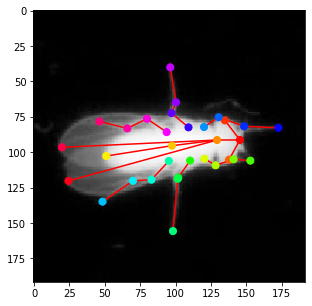

In [21]:
image, keypoints = data_generator[0]

plt.figure(figsize=(5,5))
image = image[0] if image.shape[-1] is 3 else image[0, ..., 0]
cmap = None if image.shape[-1] is 3 else 'gray'
plt.imshow(image, cmap=cmap, interpolation='none')
for idx, jdx in enumerate(data_generator.graph):
    if jdx > -1:
        plt.plot(
            [keypoints[0, idx, 0], keypoints[0, jdx, 0]],
            [keypoints[0, idx, 1], keypoints[0, jdx, 1]],
            'r-'
        )
plt.scatter(keypoints[0, :, 0], keypoints[0, :, 1], c=np.arange(data_generator.keypoints_shape[0]), s=50, cmap=plt.cm.hsv, zorder=3)

plt.show()